In [ ]:
import os
os.environ["XLA_FLAGS"] = "--xla_force_host_platform_device_count=8"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install transformers
!pip install emoji
!pip install vncorenlp
!pip install sentence_transformers

In [ ]:
from google.colab import files, output

!pip3 install vncorenlp
!mkdir -p vncorenlp/models/wordsegmenter
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
!wget https://github.com/vncorenlp/VnCoreNLP/blob/master/models/postagger/vi-tagger
!wget -O vn_syllables.txt https://raw.githubusercontent.com/HienBM/sentiment_analysis_with_deep_learning/main/hieuthi-all-vietnamese-syllables.txt
!mv VnCoreNLP-1.1.1.jar vncorenlp/
!mv vi-vocab vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/
!pip install emot
!pip install emoji
!pip install pyvi
!pip install transformers
!pip install torch
!pip install dataloader
!pip install fairseq
!pip install keras-tuner -q
!pip install tensorflow_addons
!pip install unidecode
!pip install py_vncorenlp
!pip install dash
!pip install google_play_scraper
!pip install pandas
!pip install wordcloud matplotlib
output.clear()

In [ ]:
import pandas as pd
from unicodedata import digit
import warnings
warnings.filterwarnings("ignore")
from vncorenlp import VnCoreNLP
rdrsegmenter = VnCoreNLP("/content/vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import re
import json
import logging as lg

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


In [ ]:
stop_words_file = "/content/drive/MyDrive/vietnamese-stopwords.txt"
with open(stop_words_file) as f:
    vnmese_stopwords = f.read().splitlines()
print(vnmese_stopwords)

['a lô', 'a ha', 'ai', 'ai ai', 'ai nấy', 'ai đó', 'alô', 'amen', 'anh', 'anh ấy', 'ba', 'ba ba', 'ba bản', 'ba cùng', 'ba họ', 'ba ngày', 'ba ngôi', 'ba tăng', 'bao giờ', 'bao lâu', 'bao nhiêu', 'bao nả', 'bay biến', 'biết', 'biết bao', 'biết bao nhiêu', 'biết chắc', 'biết chừng nào', 'biết mình', 'biết mấy', 'biết thế', 'biết trước', 'biết việc', 'biết đâu', 'biết đâu chừng', 'biết đâu đấy', 'biết được', 'buổi', 'buổi làm', 'buổi mới', 'buổi ngày', 'buổi sớm', 'bà', 'bà ấy', 'bài', 'bài bác', 'bài bỏ', 'bài cái', 'bác', 'bán', 'bán cấp', 'bán dạ', 'bán thế', 'bây bẩy', 'bây chừ', 'bây giờ', 'bây nhiêu', 'bèn', 'béng', 'bên', 'bên bị', 'bên có', 'bên cạnh', 'bông', 'bước', 'bước khỏi', 'bước tới', 'bước đi', 'bạn', 'bản', 'bản bộ', 'bản riêng', 'bản thân', 'bản ý', 'bất chợt', 'bất cứ', 'bất giác', 'bất kì', 'bất kể', 'bất kỳ', 'bất luận', 'bất ngờ', 'bất nhược', 'bất quá', 'bất quá chỉ', 'bất thình lình', 'bất tử', 'bất đồ', 'bấy', 'bấy chầy', 'bấy chừ', 'bấy giờ', 'bấy lâu', 'bấy lâ

In [ ]:
# Tạo từ điển stopwrords việt nam
file_path = '/content/drive/Shareddrives/[NCKH] /CODE/DATA/vietnamese-stopwords-dash.txt'
with open(file_path, 'r') as file:
    content = file.readlines()
    vietnamese_stopwords = [line.strip() for line in content]

print(vietnamese_stopwords)

['a_lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy', 'ai_đó', 'alô', 'amen', 'anh', 'anh_ấy', 'ba', 'ba_ba', 'ba_bản', 'ba_cùng', 'ba_họ', 'ba_ngày', 'ba_ngôi', 'ba_tăng', 'bao_giờ', 'bao_lâu', 'bao_nhiêu', 'bao_nả', 'bay_biến', 'biết', 'biết_bao', 'biết_bao_nhiêu', 'biết_chắc', 'biết_chừng_nào', 'biết_mình', 'biết_mấy', 'biết_thế', 'biết_trước', 'biết_việc', 'biết_đâu', 'biết_đâu_chừng', 'biết_đâu_đấy', 'biết_được', 'buổi', 'buổi_làm', 'buổi_mới', 'buổi_ngày', 'buổi_sớm', 'bà', 'bà_ấy', 'bài', 'bài_bác', 'bài_bỏ', 'bài_cái', 'bác', 'bán', 'bán_cấp', 'bán_dạ', 'bán_thế', 'bây_bẩy', 'bây_chừ', 'bây_giờ', 'bây_nhiêu', 'bèn', 'béng', 'bên', 'bên_bị', 'bên_có', 'bên_cạnh', 'bông', 'bước', 'bước_khỏi', 'bước_tới', 'bước_đi', 'bạn', 'bản', 'bản_bộ', 'bản_riêng', 'bản_thân', 'bản_ý', 'bất_chợt', 'bất_cứ', 'bất_giác', 'bất_kì', 'bất_kể', 'bất_kỳ', 'bất_luận', 'bất_ngờ', 'bất_nhược', 'bất_quá', 'bất_quá_chỉ', 'bất_thình_lình', 'bất_tử', 'bất_đồ', 'bấy', 'bấy_chầy', 'bấy_chừ', 'bấy_giờ', 'bấy_lâu', 'bấy_lâ

In [ ]:
def remove_stopwords(text, stopwords):
    # Tách văn bản thành các từ riêng lẻ
    words = text.split()

    # Loại bỏ các stop word
    filtered_words = [word for word in words if word not in stopwords]

    # Tạo lại văn bản từ các từ đã lọc
    filtered_text = ' '.join(filtered_words)

    # Trả về kết quả
    return filtered_text

# Ví dụ sử dụng hàm remove_stopwords
stopwords = vietnamese_stopwords
text = "a_lô có ai ở nhà không tôi là nhân_viên giao_hàng"
result = remove_stopwords(text, stopwords)
print(result)

nhân_viên giao_hàng


In [ ]:
def isnan(s):
    return s != s

# Tiền xử lý text
def normalizePost(post, tweet_tokenizer, vncorenlp, use_segment=False, remove_punc_stopword=False, lowercase_opt=False, truncation_method="head_only", length=256):
    post = post.strip()
    URL_pattern = r"(?:http?s://|www.)[^\"]+"
    hashtag_pattern = r"#\w+"

    post = re.sub(URL_pattern, "", post)
    post = re.sub(hashtag_pattern, "hashtag", post)
    post = re.sub("\.+",".", post)
    # post = re.sub("#\s+", " ", post)
    post = re.sub("\*+", " ", post)
    post = re.sub("\$+", "đô ", post)
    post = re.sub("-{2,}", "", post)
    post = re.sub("\@+", "", post)
    post = re.sub("\[[0-9]?[0-9]]", " : dẫn_chứng ", post)

    post = post.strip()
    if lowercase_opt:
      post = post.lower()
    tokens = tweet_tokenizer.tokenize(post.replace("’", "'").replace("…", "..."))

    post = " ".join(tokens)
    if use_segment:
        tokens = vncorenlp.tokenize(post.replace("’", "'").replace("…", "..."))
        tokens = [t for ts in tokens for t in ts]
    normPost = " ".join(tokens)

    if remove_punc_stopword:
      tokens = [t for t in normPost if not t in vnmese_stopwords]
    normPost = " ".join(tokens)

    normPost = re.sub(r",([0-9]{2,4}) , ([0-9]{2,4})", r",\1,\2", normPost)
    normPost = re.sub(r"([0-9]{1,3}) / ([0-9]{2,4})", r"\1/\2", normPost)
    normPost = re.sub(r"([0-9]{1,3})- ([0-9]{2,4})", r"\1-\2", normPost)
    if use_segment:
        normPost = normPost.replace('< url >', '')
        normPost = re.sub(r"# (\w+)", r'#\1', normPost)
    if truncation_method == "head_only":
      normPost = " ".join(normPost.split(" ")[:length])
    if truncation_method == "tail_only":
      normPost = " ".join(normPost.split(" ")[-length:])
    if truncation_method == "head_tail":
      normPost = " ".join(normPost.split(" ")[:int(length*0.25)]) + " " +  " ".join(normPost.split(" ")[-int(length*0.75):])

    replace_list = json.load(open("/content/drive/MyDrive/replace_list.txt"))
    for k, v in replace_list.items():
        normPost = normPost.replace(k, v)
    return normPost

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/Shareddrives/[NCKH] /CODE/DATA/train.csv')
df = df.drop_duplicates()

In [ ]:
df.shape

(5172, 8)

In [ ]:
df_train = pd.read_csv('/content/drive/Shareddrives/[NCKH] /CODE/DATA/train.csv')

In [ ]:
df_train.shape

(5172, 8)

In [ ]:
# Remove Dup
df = df_train.drop_duplicates(subset=['post_message'])

# Remove Null
df = df.dropna(subset=['post_message'])

# Số lượng Dup và Null bị loại bỏ của test
rows_removed_train = df_train.shape[0] - df.shape[0]
print("Số dòng bị loại bỏ từ DataFrame train:", rows_removed_train)
null_count_train = df_train['post_message'].isnull().sum()
print("Số lượng giá trị null trong cột 'post_message' từ DataFrame train:", null_count_train)

Số dòng bị loại bỏ từ DataFrame train: 310
Số lượng giá trị null trong cột 'post_message' từ DataFrame train: 1


In [ ]:
df_train_unique.shape

(4862, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4862 entries, 0 to 5171
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_name         4862 non-null   object 
 1   post_message      4862 non-null   object 
 2   timestamp_post    4716 non-null   object 
 3   num_like_post     4730 non-null   object 
 4   num_comment_post  4848 non-null   object 
 5   num_share_post    4002 non-null   object 
 6   label             4862 non-null   int64  
 7   id                4063 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 341.9+ KB


In [ ]:
df.head(10)

,user_name,post_message,timestamp_post,num_like_post,num_comment_post,num_share_post,label,id
0,2167074723833126912,"Cần các bậc phụ_huynh xã Ngũ_Thái lên_tiếng , ...",1584426000.0,45,15,8,1,NaN
1,7368497547812410368,KÊU_GỌI ĂN_CHAY CẦU_NGUYỆN XIN CHÚA CỨU KHỎI D...,1581362736.0,979,39,138,1,NaN
2,-5754142625280308224,"Giàn khoan dầu_khí gặp sự_cố , chết người !Già...",1587041580.0,85,13,61,1,NaN
3,4177935308849652224,"Thuận_Lợi có ca dương_tính CV19 rồi đó , mọi n...",1596449280.0,114,12,5,1,NaN
4,5540309800745996288,Sa_Pa cho 9 người khách nước_ngoài đi cùng chu...,1583548080.0,166,4,21,1,NaN
5,7649993800071920640,Mọi người ra đường nhớ đeo khẩu_trang nha .Đã ...,1596949200.0,unknown,unknown,unknown,1,NaN
6,-4236764214323896832,"TIN CHẤN_ĐỘNG , NHÂN_LOẠI ĐƯỢC CỨU 100% người ...",1584717660.0,21,5,1 share,1,NaN
7,-3045551117236283904,Tin_Đức_Giáo hoàng Phanxicô và hai phụ_tá được...,1583140380.0,166,15,5,1,NaN
8,-931492864188107776,Chất chlorine dioxide ( còn gọi là ‘ MMS ’ ) k...,1583237700.0,342,12,26,1,NaN
9,4293892320686232064,Virus Corona là vũ_khí_sinh_học ?Hiện_nay có n...,1582507020.0,23,10,0,1,NaN


In [ ]:
df.head(10)

,user_name,post_message,timestamp_post,num_like_post,num_comment_post,num_share_post,label,id
0,2167074723833126912,"Cần các bậc phụ_huynh xã Ngũ_Thái lên_tiếng , ...",1584426000.0,45,15,8,1.0,NaN
1,7368497547812410368,KÊU_GỌI ĂN_CHAY CẦU_NGUYỆN XIN CHÚA CỨU KHỎI D...,1581362736.0,979,39,138,1.0,NaN
2,-5754142625280308224,"Giàn khoan dầu_khí gặp sự_cố , chết người !Già...",1587041580.0,85,13,61,1.0,NaN
3,4177935308849652224,"Thuận_Lợi có ca dương_tính CV19 rồi đó , mọi n...",1596449280.0,114,12,5,1.0,NaN
4,5540309800745996288,Sa_Pa cho 9 người khách nước_ngoài đi cùng chu...,1583548080.0,166,4,21,1.0,NaN
5,7649993800071920640,Mọi người ra đường nhớ đeo khẩu_trang nha .Đã ...,1596949200.0,unknown,unknown,unknown,1.0,NaN
6,-4236764214323896832,"TIN CHẤN_ĐỘNG , NHÂN_LOẠI ĐƯỢC CỨU 100% người ...",1584717660.0,21,5,1 share,1.0,NaN
7,-3045551117236283904,Tin_Đức_Giáo hoàng Phanxicô và hai phụ_tá được...,1583140380.0,166,15,5,1.0,NaN
8,-931492864188107776,Chất chlorine dioxide ( còn gọi là ‘ MMS ’ ) k...,1583237700.0,342,12,26,1.0,NaN
9,4293892320686232064,Virus Corona là vũ_khí_sinh_học ?Hiện_nay có n...,1582507020.0,23,10,0,1.0,NaN


In [ ]:
# Hàm tính số từ trong một chuỗi
def count_words(text):
    return len(text.split())

# Hàm tính số ký tự trong một chuỗi (loại bỏ dấu cách)
def count_characters(text):
    return len(text.replace(" ", ""))

def count_hashtags(text):
    count = text.count('#')
    return count

def count_url(text):
    count1 = text.count('url')
    count2 = text.count('URL')
    count = count1 + count2
    return count

In [ ]:
# Thêm các cột vào df
df['num_word'] = df['post_message'].apply(count_words)
df['num_char'] = df['post_message'].apply(count_characters)
df['num_hashtag'] = df['post_message'].apply(str).apply(count_hashtags)
df['num_url'] = df['post_message'].apply(str).apply(count_url)

In [ ]:
df_timestamp = df.dropna(subset=['timestamp_post'])
df_timestamp = df_timestamp[~df_timestamp['timestamp_post'].str.contains(r'[a-zA-Z]')]
print(df_timestamp.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4708 entries, 0 to 5171
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_name         4708 non-null   object 
 1   post_message      4708 non-null   object 
 2   timestamp_post    4708 non-null   object 
 3   num_like_post     4577 non-null   object 
 4   num_comment_post  4694 non-null   object 
 5   num_share_post    3848 non-null   object 
 6   label             4708 non-null   int64  
 7   id                3977 non-null   float64
 8   num_word          4708 non-null   int64  
 9   num_char          4708 non-null   int64  
 10  num_hashtag       4708 non-null   int64  
 11  num_url           4708 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 478.2+ KB
None


In [ ]:
df_timestamp.shape

(4708, 12)

In [ ]:
!pip install wordcloud matplotlib

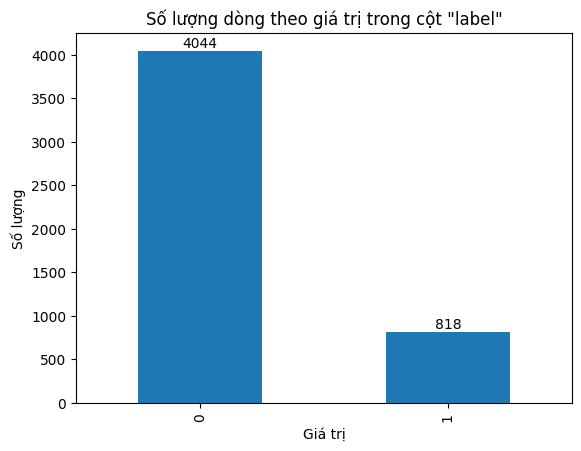

In [ ]:
import matplotlib.pyplot as plt

# Đếm số lượng dòng cho mỗi giá trị trong cột "label"
value_counts = df['label'].value_counts()

# Tạo biểu đồ cột
ax = value_counts.plot(kind='bar')

# Đặt tiêu đề và nhãn trục
plt.title('Số lượng dòng theo giá trị trong cột "label"')
plt.xlabel('Giá trị')
plt.ylabel('Số lượng')

# Hiển thị số lượng ở đầu cột
for i, v in enumerate(value_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Hiển thị biểu đồ
plt.show()


In [ ]:
from datetime import datetime

def transform_timestamp(timestamp):
    # Chuyển đổi chuỗi thành số thực
    timestamp_float = float(timestamp)

    # Lấy phần nguyên của số thực
    timestamp_int = int(timestamp_float)

    # Chuyển đổi timestamp thành đối tượng datetime
    dt = datetime.fromtimestamp(timestamp_int)

    # Lấy giá trị hour (giờ)
    hour = dt.hour

    # Lấy giá trị weekday (thứ trong tuần)
    weekday = dt.weekday()

    # Lấy giá trị day (ngày)
    day = dt.day

    # Lấy giá trị month (tháng)
    month = dt.month
    year = dt.year

    # Tạo list chứa các giá trị đã lấy
    result = [hour, weekday, day, month, year]

    # Trả về kết quả
    return result

In [ ]:
df_timestamp[['hour', 'weekday', 'day', 'month', 'year']] = df_timestamp['timestamp_post'].astype(str).apply(transform_timestamp).apply(pd.Series)

In [ ]:
df_timestamp.head(10)

,user_name,post_message,timestamp_post,num_like_post,num_comment_post,num_share_post,label,id,num_word,num_char,num_hashtag,num_url,hour,weekday,day,month,year
0,2167074723833126912,"Cần các bậc phụ_huynh xã Ngũ_Thái lên_tiếng , ...",1584426000.0,45,15,8,1,NaN,34,149,0,0,6,1,17,3,2020
1,7368497547812410368,KÊU_GỌI ĂN_CHAY CẦU_NGUYỆN XIN CHÚA CỨU KHỎI D...,1581362736.0,979,39,138,1,NaN,10,53,0,0,19,0,10,2,2020
2,-5754142625280308224,"Giàn khoan dầu_khí gặp sự_cố , chết người !Già...",1587041580.0,85,13,61,1,NaN,41,172,0,0,12,3,16,4,2020
3,4177935308849652224,"Thuận_Lợi có ca dương_tính CV19 rồi đó , mọi n...",1596449280.0,114,12,5,1,NaN,28,124,0,0,10,0,3,8,2020
4,5540309800745996288,Sa_Pa cho 9 người khách nước_ngoài đi cùng chu...,1583548080.0,166,4,21,1,NaN,13,53,0,0,2,5,7,3,2020
5,7649993800071920640,Mọi người ra đường nhớ đeo khẩu_trang nha .Đã ...,1596949200.0,unknown,unknown,unknown,1,NaN,17,64,0,0,5,6,9,8,2020
6,-4236764214323896832,"TIN CHẤN_ĐỘNG , NHÂN_LOẠI ĐƯỢC CỨU 100% người ...",1584717660.0,21,5,1 share,1,NaN,62,267,0,0,15,4,20,3,2020
7,-3045551117236283904,Tin_Đức_Giáo hoàng Phanxicô và hai phụ_tá được...,1583140380.0,166,15,5,1,NaN,12,75,0,0,9,0,2,3,2020
8,-931492864188107776,Chất chlorine dioxide ( còn gọi là ‘ MMS ’ ) k...,1583237700.0,342,12,26,1,NaN,37,152,0,0,12,1,3,3,2020
9,4293892320686232064,Virus Corona là vũ_khí_sinh_học ?Hiện_nay có n...,1582507020.0,23,10,0,1,NaN,26,124,0,0,1,0,24,2,2020


In [ ]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

In [ ]:
for post_message in df.post_message:
    if pd.isnull(post_message):
        continue  # Skip this iteration if the post_message is NaN
    post_message = str(post_message)  # Convert post_message to string
    train_sents.append(normalizePost(post_message, tweet_tokenizer, rdrsegmenter, False, False, False, "head_tail", 256))

In [ ]:
df.head(20)

,user_name,post_message,timestamp_post,num_like_post,num_comment_post,num_share_post,label,id,num_word,num_char,num_hashtag,num_url
0,2167074723833126912,"Cần các bậc phụ_huynh xã Ngũ_Thái lên_tiếng , ...",1584426000.0,45,15,8,1,NaN,34,149,0,0
1,7368497547812410368,KÊU_GỌI ĂN_CHAY CẦU_NGUYỆN XIN CHÚA CỨU KHỎI D...,1581362736.0,979,39,138,1,NaN,10,53,0,0
2,-5754142625280308224,"Giàn khoan dầu_khí gặp sự_cố , chết người !Già...",1587041580.0,85,13,61,1,NaN,41,172,0,0
3,4177935308849652224,"Thuận_Lợi có ca dương_tính CV19 rồi đó , mọi n...",1596449280.0,114,12,5,1,NaN,28,124,0,0
4,5540309800745996288,Sa_Pa cho 9 người khách nước_ngoài đi cùng chu...,1583548080.0,166,4,21,1,NaN,13,53,0,0
5,7649993800071920640,Mọi người ra đường nhớ đeo khẩu_trang nha .Đã ...,1596949200.0,unknown,unknown,unknown,1,NaN,17,64,0,0
6,-4236764214323896832,"TIN CHẤN_ĐỘNG , NHÂN_LOẠI ĐƯỢC CỨU 100% người ...",1584717660.0,21,5,1 share,1,NaN,62,267,0,0
7,-3045551117236283904,Tin_Đức_Giáo hoàng Phanxicô và hai phụ_tá được...,1583140380.0,166,15,5,1,NaN,12,75,0,0
8,-931492864188107776,Chất chlorine dioxide ( còn gọi là ‘ MMS ’ ) k...,1583237700.0,342,12,26,1,NaN,37,152,0,0
9,4293892320686232064,Virus Corona là vũ_khí_sinh_học ?Hiện_nay có n...,1582507020.0,23,10,0,1,NaN,26,124,0,0


In [ ]:
df_real = df[df['label'] == 0]
df_fake = df[df['label'] == 1]

In [ ]:
df_real.shape

(4044, 12)

In [ ]:
df_fake.shape

(818, 12)

In [ ]:
df_fake['post_message'] = df_fake['post_message'].apply(lambda x: remove_stopwords(str(x), stopwords) if pd.notnull(x) else x)
df_real['post_message'] = df_real['post_message'].apply(lambda x: remove_stopwords(str(x), stopwords) if pd.notnull(x) else x)

In [ ]:
df_real['normalized_post_message'] = df_real['post_message'].apply(lambda x: normalizePost(str(x), tweet_tokenizer, rdrsegmenter, False, False, False, "head_tail", 256) if pd.notnull(x) else x)

In [ ]:
df_real.head(20)

,user_name,post_message,timestamp_post,num_like_post,num_comment_post,num_share_post,label,id,num_word,num_char,num_hashtag,num_url,normalized_post_message
200,-8316532421526346752,Hiệp_hội Bất_động_sản TP. HCM ( HoREA ) văn_bả...,1593420550.0,2,0,NaN,0,NaN,48,243,0,0,Hiệp_hội Bất_động_sản TP . HCM ( HoREA ) văn_b...
201,4686056574353032192,Trước tình_hình diễn_biến phức_tạp dịch_bệnh C...,1582419477.0,1500,610,2300,0,NaN,122,590,0,0,Trước tình_hình diễn_biến phức_tạp dịch_bệnh C...
202,-8906719260466179072,""" Hôm_qua tham_gia trả_lời phỏng_vấn Đài tiếng...",1592972382.0,8,0,1,0,NaN,62,458,0,0,""" Hôm_qua tham_gia trả_lời phỏng_vấn Đài tiếng..."
203,1543548005049796096,# * * Nỗ lực hỗ trợ doanh nghiệp vượt kh...,1588006274.0,NaN,0,NaN,0,NaN,1000,4246,11,0,# Nỗ lực hỗ trợ doanh nghiệp vượt khó #...
204,803527139942472064,"Tiếp_tục chống dịch hiệu_quả , 6/4 , Việt_Nam ...",1586145393.0,26,8,1,0,NaN,141,576,0,0,"Tiếp_tục chống dịch hiệu_quả , 6/4 , Việt_Nam ..."
205,1640000666715729920,"Chắc xây xong vé thu tiền nợ ?"" Trong UBND Huy...",1588746260.0,73,42,8,0,NaN,51,194,0,0,"Chắc xây xong vé thu tiền nợ ? "" Trong UBND Hu..."
206,-9100709914233624576,Bộ Tài_nguyên Môi_trường ; Tổng_cục Địa_chất K...,1589255740.0,5,0,1,0,NaN,18,361,0,0,Bộ Tài_nguyên Môi_trường ; Tổng_cục Địa_chất K...
207,-4705183518513794048,NÓNG : Bệnh_nhân 137 ' dương_tính trở_lại xuất...,1587715791.0,5,0,2,0,NaN,35,177,0,0,NÓNG : Bệnh_nhân 137 ' dương_tính trở_lại xuất...
208,-2519929563445468160,"Mới_đây , Bộ T T&T T tổ_chức lễ ra_mắt ứng_dụn...",1589553921.0,13,6,NaN,0,NaN,76,353,0,0,"Mới_đây , Bộ T T & T T tổ_chức lễ ra_mắt ứng_d..."
209,-2856141489536363008,Hồ_Duy_Hải đường sống ???[ https://lsvn.vn/co-...,1588983037.0,11,3,2,0,NaN,7,200,0,0,Hồ_Duy_Hải đường sống ? ? ? [ Hồ_Duy_Hải đường...


In [ ]:
df_fake['normalized_post_message'] = df_fake['post_message'].apply(lambda x: normalizePost(str(x), tweet_tokenizer, rdrsegmenter, False, False, False, "head_tail", 256) if pd.notnull(x) else x)

In [ ]:
df_fake.head(20)

,user_name,post_message,timestamp_post,num_like_post,num_comment_post,num_share_post,label,id,num_word,num_char,num_hashtag,num_url,normalized_post_message
0,2167074723833126912,"Cần bậc phụ_huynh xã Ngũ_Thái lên_tiếng , ngờ ...",1584426000.0,45,15,8,1,NaN,34,149,0,0,"Cần bậc phụ_huynh xã Ngũ_Thái lên_tiếng , ngờ ..."
1,7368497547812410368,KÊU_GỌI ĂN_CHAY CẦU_NGUYỆN XIN CHÚA CỨU KHỎI D...,1581362736.0,979,39,138,1,NaN,10,53,0,0,KÊU_GỌI ĂN_CHAY CẦU_NGUYỆN XIN CHÚA CỨU KHỎI D...
2,-5754142625280308224,"Giàn khoan dầu_khí sự_cố , chết !Giàn khoan dầ...",1587041580.0,85,13,61,1,NaN,41,172,0,0,"Giàn khoan dầu_khí sự_cố , chết ! Giàn khoan d..."
3,4177935308849652224,"Thuận_Lợi ca dương_tính CV19 , Đồng_Xoài cẩn_t...",1596449280.0,114,12,5,1,NaN,28,124,0,0,"Thuận_Lợi ca dương_tính CV19 , Đồng_Xoài cẩn_t..."
4,5540309800745996288,Sa_Pa 9 nước_ngoài đi chuyến bay Nhung …,1583548080.0,166,4,21,1,NaN,13,53,0,0,Sa_Pa 9 nước_ngoài đi chuyến bay Nhung ... Sa_...
5,7649993800071920640,Mọi đường đeo khẩu_trang nha .Đã 2 trường_hợp ...,1596949200.0,unknown,unknown,unknown,1,NaN,17,64,0,0,Mọi đường đeo khẩu_trang nha . Đã 2 trường_hợp...
6,-4236764214323896832,"TIN CHẤN_ĐỘNG , NHÂN_LOẠI ĐƯỢC CỨU 100% thử_ng...",1584717660.0,21,5,1 share,1,NaN,62,267,0,0,"TIN CHẤN_ĐỘNG , NHÂN_LOẠI ĐƯỢC CỨU 100 % thử_n..."
7,-3045551117236283904,Tin_Đức_Giáo hoàng Phanxicô hai phụ_tá xét_ngh...,1583140380.0,166,15,5,1,NaN,12,75,0,0,Tin_Đức_Giáo hoàng Phanxicô hai phụ_tá xét_ngh...
8,-931492864188107776,Chất chlorine dioxide ( gọi ‘ MMS ’ ) chất tiê...,1583237700.0,342,12,26,1,NaN,37,152,0,0,Chất chlorine dioxide ( gọi ‘ MMS ' ) chất tiê...
9,4293892320686232064,Virus Corona vũ_khí_sinh_học ?Hiện_nay bằng_ch...,1582507020.0,23,10,0,1,NaN,26,124,0,0,Virus Corona vũ_khí_sinh_học ? Hiện_nay bằng_c...


In [ ]:
!pip install wordcloud matplotlib

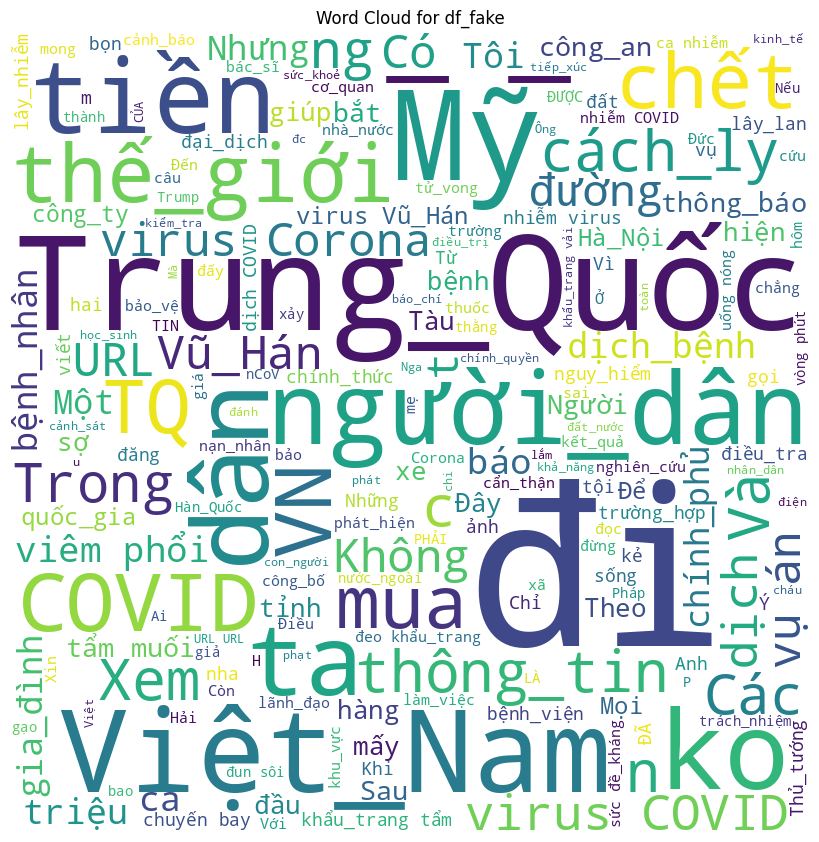

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tạo một chuỗi dài bằng cách nối tất cả các câu trong df_fake
text_fake = ' '.join(df_fake['normalized_post_message'])

# Tạo một đối tượng WordCloud
wordcloud_fake = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(text_fake)

# Vẽ hình ảnh WordCloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_fake)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud for df_fake')
plt.show()

# Lặp lại quy trình tương tự cho df_real
text_real = ' '.join(df_real['normalized_post_message'].dropna())
# Tạo một đối tượng WordCloud

wordcloud_real = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(text_real)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_real)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud for df_real')
plt.show()

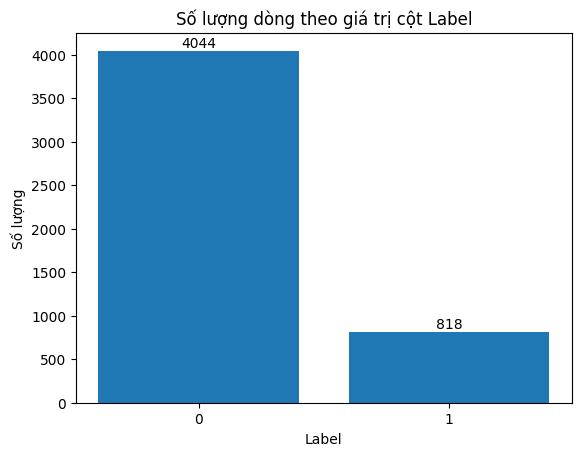

In [ ]:
#Distribution of label fake and real in dataset
import matplotlib.pyplot as plt

# Đếm số lượng dòng có giá trị cột label == 0 và label == 1
counts = df['label'].value_counts()

# Vẽ biểu đồ
bars = plt.bar(counts.index, counts.values)

plt.xlabel('Label')
plt.ylabel('Số lượng')
plt.title('Số lượng dòng theo giá trị cột Label')
plt.xticks([0, 1])

# Thêm số lượng trên mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

plt.show()

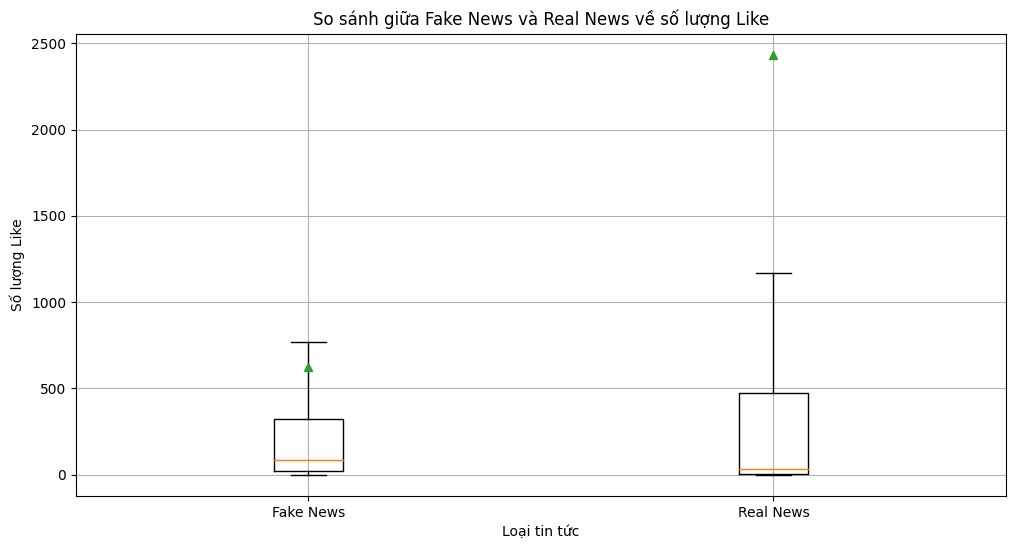

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Chuyển đổi cột 'num_like_post' sang dạng số và loại bỏ các giá trị không hợp lệ
df_timestamp['num_like_post'] = pd.to_numeric(df_timestamp['num_like_post'], errors='coerce')

# Loại bỏ các giá trị NaN
df_timestamp = df_timestamp.dropna(subset=['num_like_post'])

# Tạo dataframe cho fake news và real news
df_real = df_timestamp[df_timestamp['label'] == 0]['num_like_post']
df_fake = df_timestamp[df_timestamp['label'] == 1]['num_like_post']

# Kiểm tra xem liệu có dữ liệu để vẽ biểu đồ
if len(df_fake) > 0 and len(df_real) > 0:
    # Tạo biểu đồ box plot
    fig, ax = plt.subplots(figsize=(12, 6))
    box_plot = ax.boxplot([df_fake, df_real], labels=['Fake News', 'Real News'], showmeans=True, showfliers=False)

    plt.title('So sánh giữa Fake News và Real News về số lượng Like')
    plt.xlabel('Loại tin tức')
    plt.ylabel('Số lượng Like')
    plt.grid(True)

    plt.show()
else:
    print("Không có đủ dữ liệu để vẽ biểu đồ.")

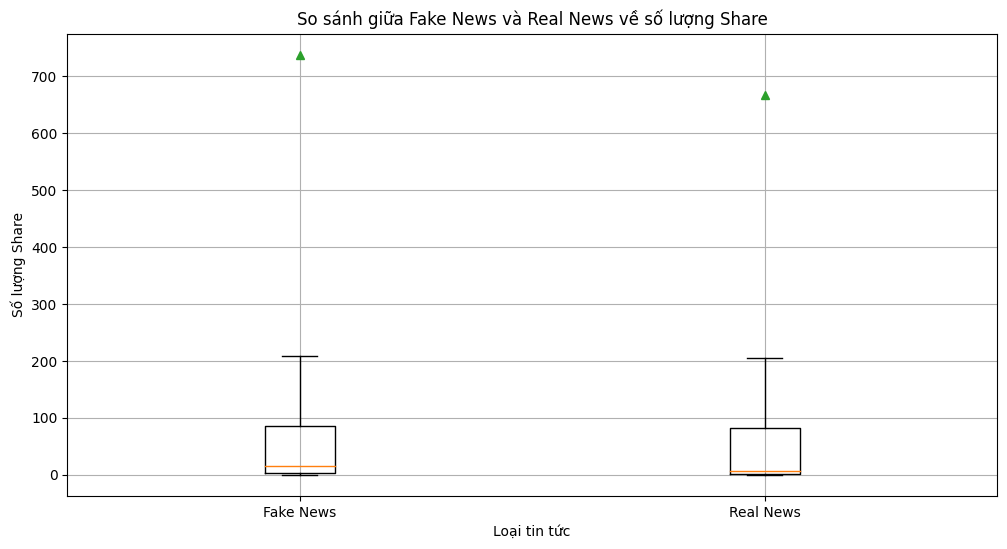

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Chuyển đổi cột 'num_share_post' sang dạng số và loại bỏ các giá trị không hợp lệ
df_timestamp['num_share_post'] = pd.to_numeric(df_timestamp['num_share_post'], errors='coerce')

# Loại bỏ các giá trị NaN
df_timestamp = df_timestamp.dropna(subset=['num_share_post'])

# Tạo dataframe cho fake news và real news
df_real = df_timestamp[df_timestamp['label'] == 0]['num_share_post']
df_fake = df_timestamp[df_timestamp['label'] == 1]['num_share_post']

# Kiểm tra xem liệu có dữ liệu để vẽ biểu đồ
if len(df_fake) > 0 and len(df_real) > 0:
    # Tạo biểu đồ box plot
    fig, ax = plt.subplots(figsize=(12, 6))
    box_plot = ax.boxplot([df_fake, df_real], labels=['Fake News', 'Real News'], showmeans=True, showfliers=False)

    plt.title('So sánh giữa Fake News và Real News về số lượng Share')
    plt.xlabel('Loại tin tức')
    plt.ylabel('Số lượng Share')
    plt.grid(True)

    plt.show()
else:
    print("Không có đủ dữ liệu để vẽ biểu đồ.")

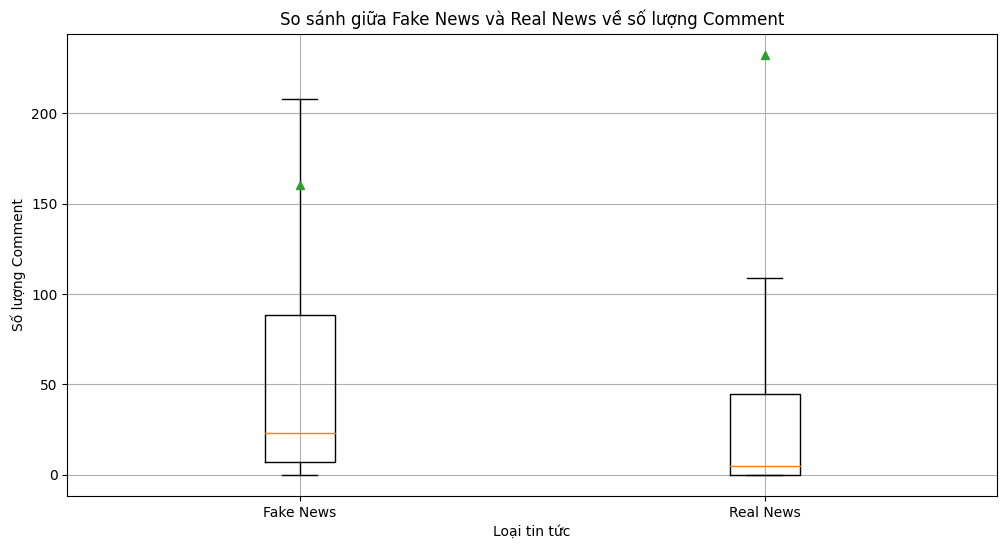

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Chuyển đổi cột 'num_comment_post' sang dạng số và loại bỏ các giá trị không hợp lệ
df_timestamp['num_comment_post'] = pd.to_numeric(df_timestamp['num_comment_post'], errors='coerce')

# Loại bỏ các giá trị NaN
df_timestamp = df_timestamp.dropna(subset=['num_comment_post'])

# Tạo dataframe cho fake news và real news
df_real = df_timestamp[df_timestamp['label'] == 0]['num_comment_post']
df_fake = df_timestamp[df_timestamp['label'] == 1]['num_comment_post']

# Kiểm tra xem liệu có dữ liệu để vẽ biểu đồ
if len(df_fake) > 0 and len(df_real) > 0:
    # Tạo biểu đồ box plot
    fig, ax = plt.subplots(figsize=(12, 6))
    box_plot = ax.boxplot([df_fake, df_real], labels=['Fake News', 'Real News'], showmeans=True, showfliers=False)

    plt.title('So sánh giữa Fake News và Real News về số lượng Comment')
    plt.xlabel('Loại tin tức')
    plt.ylabel('Số lượng Comment')
    plt.grid(True)

    plt.show()
else:
    print("Không có đủ dữ liệu để vẽ biểu đồ.")

In [ ]:
df_real_timestamp = df_timestamp[df_timestamp['label'] == 0]
df_fake_timestamp = df_timestamp[df_timestamp['label'] == 1]

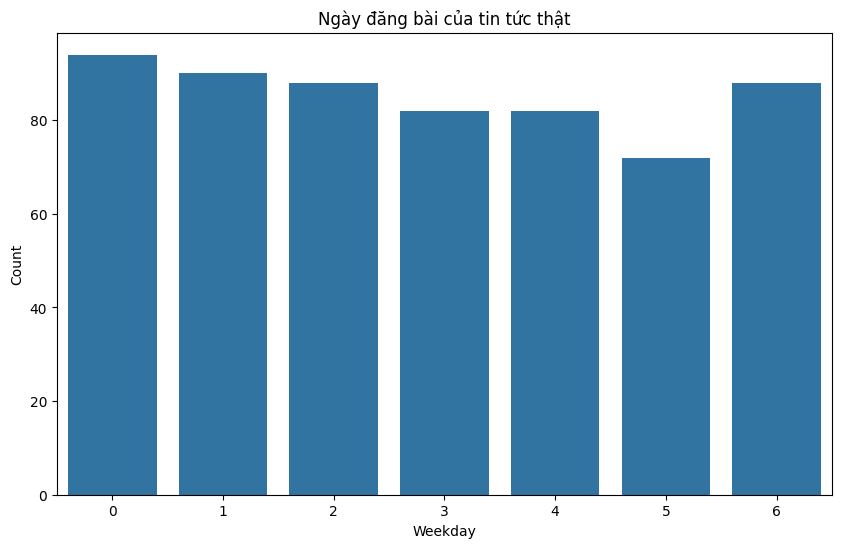

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo biểu đồ countplot với cột 'weekday'
plt.figure(figsize=(10, 6))
sns.countplot(x='weekday', data=df_fake_timestamp)

plt.title('Ngày đăng bài của tin tức thật')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()

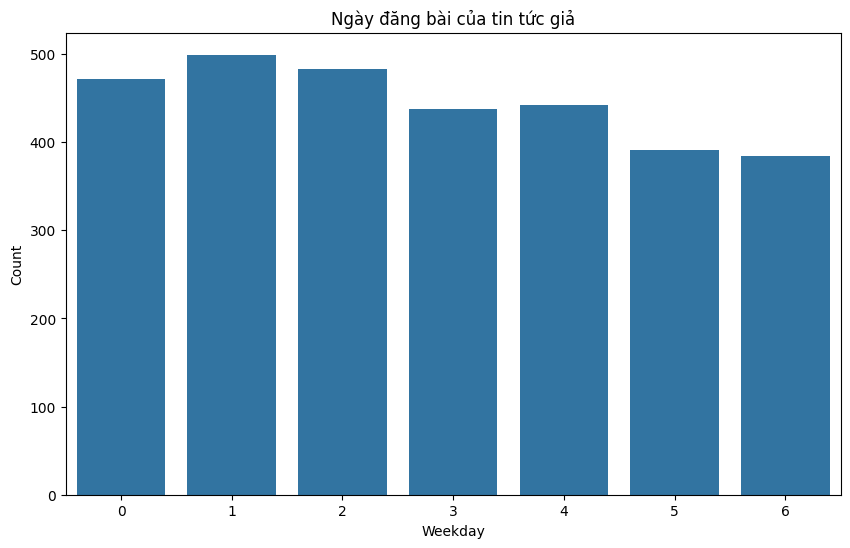

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo biểu đồ countplot với cột 'weekday'
plt.figure(figsize=(10, 6))
sns.countplot(x='weekday', data=df_real_timestamp)

plt.title('Ngày đăng bài của tin tức giả')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()

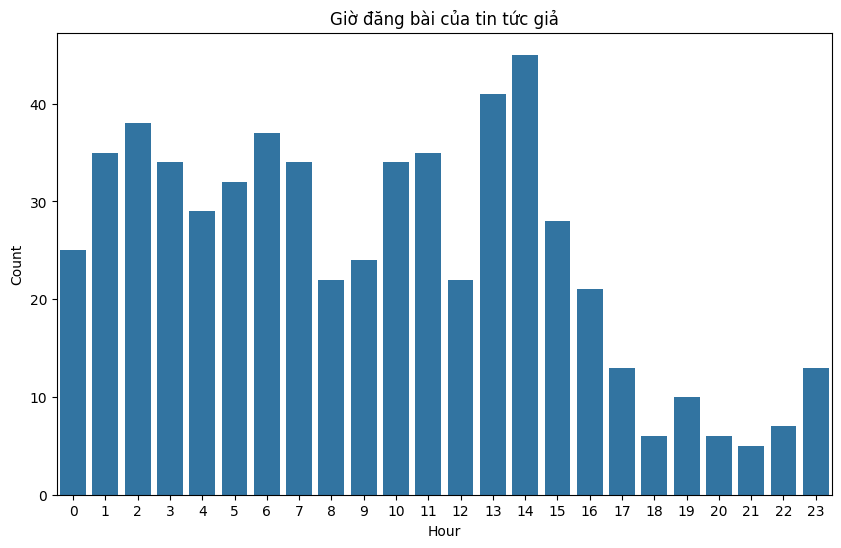

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo biểu đồ countplot với cột 'weekday'
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=df_fake_timestamp)

plt.title('Giờ đăng bài của tin tức giả')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

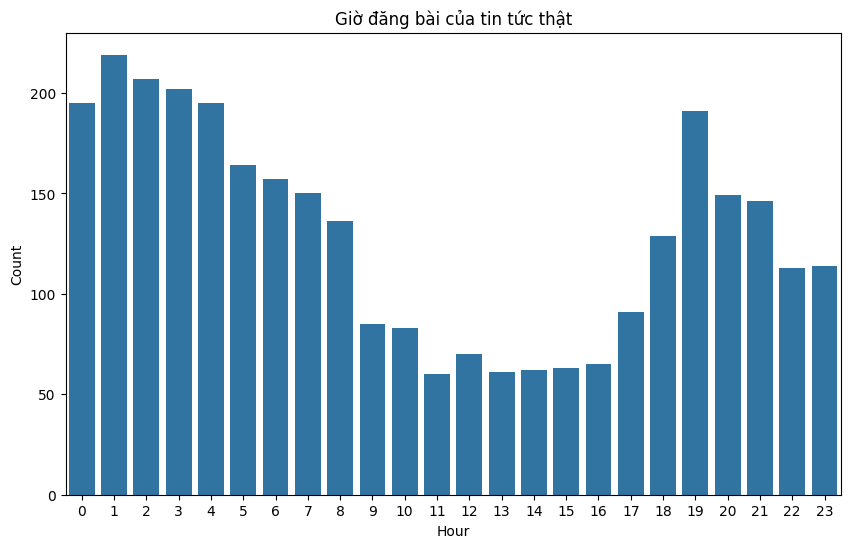

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo biểu đồ countplot với cột 'weekday'
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=df_real_timestamp)

plt.title('Giờ đăng bài của tin tức thật')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

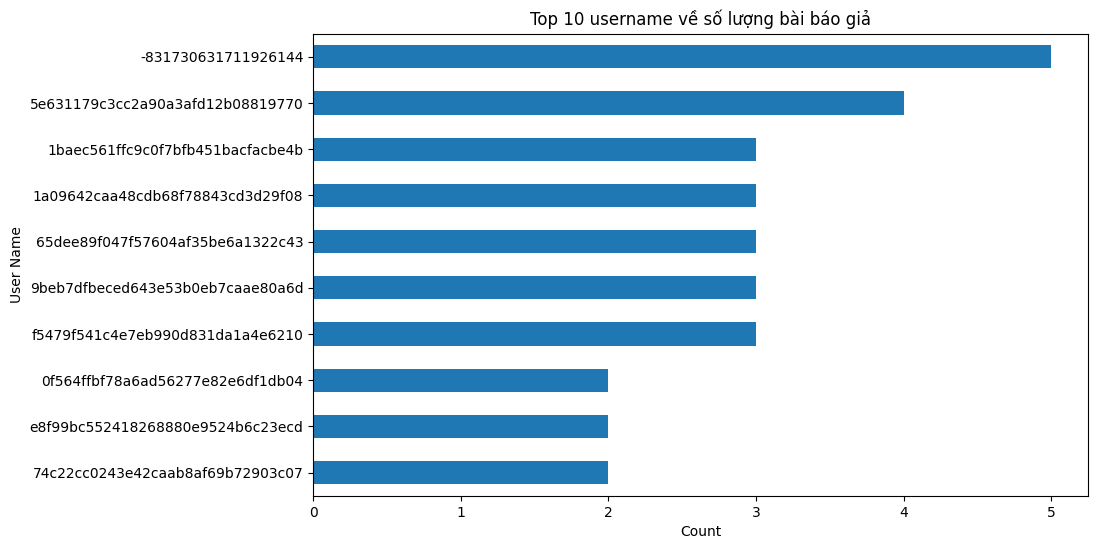

In [ ]:
import matplotlib.pyplot as plt

# Tính số lần xuất hiện của mỗi 'user_name'
user_counts = df_fake_timestamp['user_name'].value_counts()

# Lấy top 10 'user_name' xuất hiện nhiều nhất
top_users = user_counts[:10]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
top_users.plot(kind='barh')
plt.title('Top 10 username về số lượng bài báo giả')
plt.ylabel('User Name')
plt.xlabel('Count')
plt.gca().invert_yaxis()  # Đảo ngược trục y để user xuất hiện nhiều nhất ở trên cùng
plt.show()

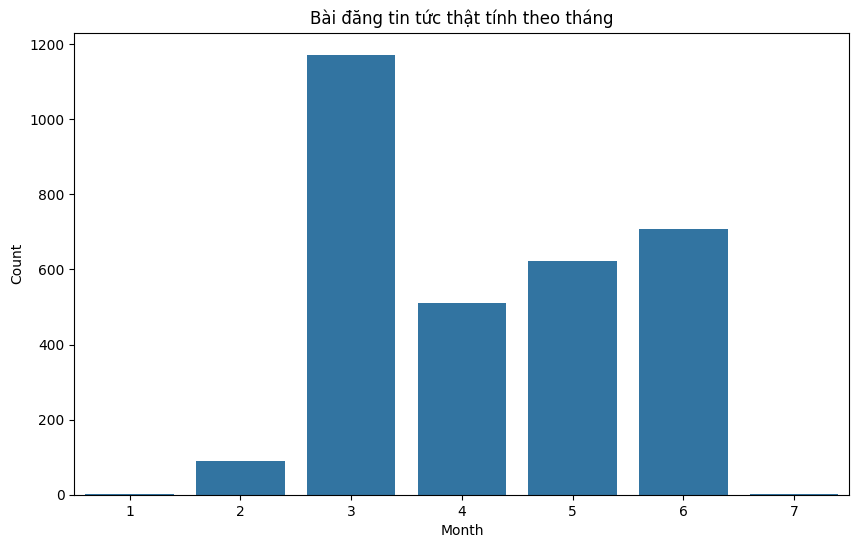

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo biểu đồ countplot với cột 'weekday'
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df_real_timestamp)

plt.title('Bài đăng tin tức thật tính theo tháng')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

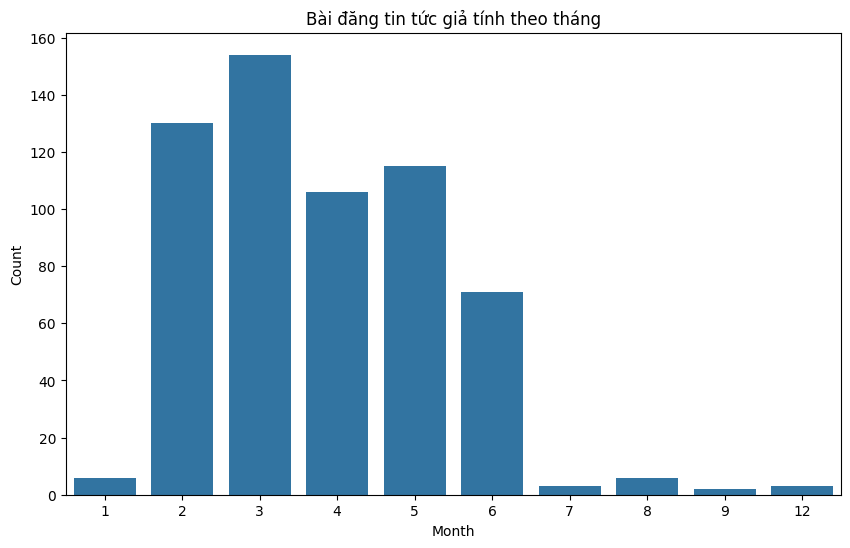

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo biểu đồ countplot với cột 'weekday'
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df_fake_timestamp)

plt.title('Bài đăng tin tức giả tính theo tháng')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()